<a href="https://colab.research.google.com/github/Muhaiminul8473/Bengali-abstractive-text-summarization/blob/main/Bangla_text_summarization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import pandas as pd
import nltk

In [3]:
pip install tensorflow==1.14

     |████████████████████████████████| 109.2MB 64kB/s 
     |████████████████████████████████| 51kB 8.5MB/s 
     |████████████████████████████████| 3.2MB 38.3MB/s 
     |████████████████████████████████| 491kB 51.6MB/s 
  Found existing installation: tensorboard 2.4.0
    Uninstalling tensorboard-2.4.0:
      Successfully uninstalled tensorboard-2.4.0
  Found existing installation: tensorflow-estimator 2.4.0
    Uninstalling tensorflow-estimator-2.4.0:
      Successfully uninstalled tensorflow-estimator-2.4.0
  Found existing installation: tensorflow 2.4.0
    Uninstalling tensorflow-2.4.0:
      Successfully uninstalled tensorflow-2.4.0


In [ ]:
df1.shape

(399, 2)

In [4]:
df=pd.read_excel("/content/gdrive/My Drive/Text summarization/newtext1.xlsx")
df.head()

,Text,Summary
0,রাজধানীর মতিঝিলের শাপলা চত্বর এলাকায় আজ বৃহস্প...,শাপলা চত্বরে বাসের ধাক্কায় নিহত ১
1,রাজধানীর পুরান ঢাকার ইসলামবাগে একটি প্লাস্টিক ...,ইসলামবাগে প্লাস্টিক কারখানায় আগুন
2,আগামী ৫ জানুয়ারি অনুমতি না পেলেও রাজধানীতে বিএ...,অনুমতি না পেলেও সমাবেশ করবে বিএনপি
3,রাজধানীর ফকিরাপুলে আজ বৃহস্পতিবার সন্ধ্যা সাতট...,ফকিরাপুলে আবাসিক হোটেলে খুন\n
4,গত বছর মোট ৪ হাজার ৬৫৪ জন নারী বিভিন্নভাবে নির...,গত বছর ৪৬৫৪ জন নারী নির্যাতনের শিকার


In [5]:
df.shape

(2731, 2)

In [6]:

for i in range(5):
    print("News:",i+1)
    print("Text:",df.Text[i])
    print("Summary:",df.Summary[i])

News: 1
Text: রাজধানীর মতিঝিলের শাপলা চত্বর এলাকায় আজ বৃহস্পতিবার সন্ধ্যায় যাত্রীবাহী বাসের ধাক্কায় রঞ্জন দেবনাথ (৩৯) নামের এক ব্যক্তি নিহত হয়েছেন।নিহত রঞ্জন দেবনাথের স্ত্রী বীণা বিশ্বাস ঢাকা মেডিকেল কলেজ হাসপাতালের স্টাফ নার্স। তিনি জানান, রঞ্জন দেবনাথ আফতাব গ্রুপে চাকরি করেন। 
Summary: শাপলা চত্বরে বাসের ধাক্কায় নিহত ১
News: 2
Text: রাজধানীর পুরান ঢাকার ইসলামবাগে একটি প্লাস্টিক পণ্য তৈরির কারখানায় আগুন লেগেছে। আজ বৃহস্পতিবার রাত ৯টা ৫৫ মিনিটে বাগানবাড়ি এলাকায় এই অগ্নিকাণ্ডের ঘটনা ঘটে।ফায়ার সার্ভিসের নিয়ন্ত্রণকক্ষে দায়িত্বরত কর্মকর্তা ফরহাদুজ্জামান প্রথম আলোকে জানান, আগুন নেভাতে ফায়ার সার্ভিসের পাঁচটি ইউনিট কাজ করছে। তবে আগুন লাগার কারণ এখনো জানা যায়নি।
Summary: ইসলামবাগে প্লাস্টিক কারখানায় আগুন
News: 3
Text: আগামী ৫ জানুয়ারি অনুমতি না পেলেও রাজধানীতে বিএনপি সমাবেশ করবে বলে জানিয়েছেন দলের যুগ্ম মহাসচিব রুহুল কবির রিজভী। আজ বৃহস্পতিবার সন্ধ্যায় জানতে চাইলে প্রথম আলোকে রিজভী জানান, ‘আমরা কর্মসূচি ঘোষণা করেছি, শান্তিপূর্ণভাবে এ কর্মসূচি পালন করব।’
Summary: অনুমতি না পেলেও সমাবেশ করবে

# New Section

In [7]:
contractions = { 
"বি.দ্র ": "বিশেষ দ্রষ্টব্য",
"ড.": "ডক্টর",
"ডা.": "ডাক্তার",
"ইঞ্জি:": "ইঞ্জিনিয়ার",
"রেজি:": "রেজিস্ট্রেশন",
"মি.": "মিস্টার",
"মু.": "মুহাম্মদ",
"মো.": "মোহাম্মদ",
}

In [8]:
import re
import string
def clean_text(text,remove_stopwords = False):
    if True:
        text = text.split()
        new_text = []
        for word in text:
            if word in contractions:
                new_text.append(contractions[word])
            else:
                new_text.append(word)
        text = " ".join(new_text)
    # Format words and remove unwanted characters
    whitespace = re.compile(u"[\s\u0020\u00a0\u1680\u180e\u202f\u205f\u3000\u2000-\u200a]+", re.UNICODE)
    bangla_digits = u"[\u09E6\u09E7\u09E8\u09E9\u09EA\u09EB\u09EC\u09ED\u09EE\u09EF]+"
    english_chars = u"[a-zA-Z0-9]"
    punc = u"[(),$%^&*+={}\[\]:\"|\'\~`<>/,¦!?½£¶¼©⅐⅑⅒⅓⅔⅕⅖⅗⅘⅙⅚⅛⅜⅝⅞⅟↉¤¿º;-]+"
    bangla_fullstop = u"\u0964"     #bangla fullstop(dari)
    punctSeq   = u"['\"“”‘’]+|[.?!,…]+|[:;]+"
    
    text = re.sub(bangla_digits, " ", text)
    text = re.sub(punc, " ", text)
    text = re.sub(english_chars, " ", text)
    text = re.sub(bangla_fullstop, " ", text)
    text = re.sub(punctSeq, " ", text)
    text = whitespace.sub(" ", text).strip()
    
    text = re.sub(r'https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)
    text = re.sub(r'\<a href', ' ', text)
    text = re.sub(r'&amp;‘:‘ ’', '', text) 
    text = re.sub(r'[_"\-;%()|+&=*%.,!?:#$@\[\]/]। ,', ' ', text)
    text = re.sub(r'<br />', ' ', text)
    text = re.sub(r'\'', ' ', text)
    text = re.sub(r"[\@$#%~+-\.\'।\"]"," ",text)
    text = re.sub(r"(?m)^\s+", "", text)
    text = re.sub("[()]","",text)
    text = re.sub("[‘’]","",text)
    text = re.sub("[!]","",text)
    text = re.sub("[/]","",text)
    text = re.sub("[:]","",text)
    text= re.sub('\ |\?|\.|\!|\/|\;|\:', ' ',text)
    text= text.strip("/")

    return text

In [9]:
clean_summaries = []
for summary in df.Summary:
    clean_summaries.append(clean_text(summary,remove_stopwords=False))
print("Summaries are complete.")

clean_texts = []
for text in df.Text:
    clean_texts.append(clean_text(text))
print("Texts are complete.")

Summaries are complete.
Texts are complete.


In [10]:

for i in range(5):
    print("Clean Text:#",i+1)
    print("Clean Summary:",clean_summaries[i])
    print("Clean Text:",clean_texts[i])
    print()

Clean Text:# 1
Clean Summary: শাপলা চত্বরে বাসের ধাক্কায় নিহত
Clean Text: রাজধানীর মতিঝিলের শাপলা চত্বর এলাকায় আজ বৃহস্পতিবার সন্ধ্যায় যাত্রীবাহী বাসের ধাক্কায় রঞ্জন দেবনাথ নামের এক ব্যক্তি নিহত হয়েছেন নিহত রঞ্জন দেবনাথের স্ত্রী বীণা বিশ্বাস ঢাকা মেডিকেল কলেজ হাসপাতালের স্টাফ নার্স তিনি জানান রঞ্জন দেবনাথ আফতাব গ্রুপে চাকরি করেন

Clean Text:# 2
Clean Summary: ইসলামবাগে প্লাস্টিক কারখানায় আগুন
Clean Text: রাজধানীর পুরান ঢাকার ইসলামবাগে একটি প্লাস্টিক পণ্য তৈরির কারখানায় আগুন লেগেছে আজ বৃহস্পতিবার রাত টা মিনিটে বাগানবাড়ি এলাকায় এই অগ্নিকাণ্ডের ঘটনা ঘটে ফায়ার সার্ভিসের নিয়ন্ত্রণকক্ষে দায়িত্বরত কর্মকর্তা ফরহাদুজ্জামান প্রথম আলোকে জানান আগুন নেভাতে ফায়ার সার্ভিসের পাঁচটি ইউনিট কাজ করছে তবে আগুন লাগার কারণ এখনো জানা যায়নি

Clean Text:# 3
Clean Summary: অনুমতি না পেলেও সমাবেশ করবে বিএনপি
Clean Text: আগামী জানুয়ারি অনুমতি না পেলেও রাজধানীতে বিএনপি সমাবেশ করবে বলে জানিয়েছেন দলের যুগ্ম মহাসচিব রুহুল কবির রিজভী আজ বৃহস্পতিবার সন্ধ্যায় জানতে চাইলে প্রথম আলোকে রিজভী জানান আমরা কর্মসূচি ঘোষণা কর

# New Section

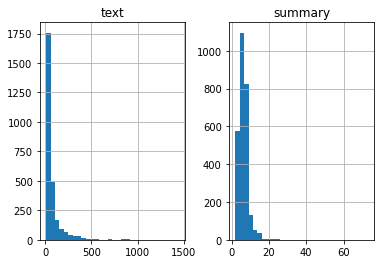

In [12]:
import matplotlib.pyplot as plt
text_word_count = []
summary_word_count = []

# populate the lists with sentence lengths
for i in df['Text']:
      text_word_count.append(len(i.split()))

for i in df['Summary']:
      summary_word_count.append(len(i.split()))

length_df = pd.DataFrame({'text':text_word_count, 'summary':summary_word_count})
length_df.hist(bins = 30)
plt.show()


In [13]:

def count_words(count_dict, text):
    for sentence in text:
        for word in sentence.split():
            if word not in count_dict:
                count_dict[word] = 1
            else:
                count_dict[word] += 1

In [14]:
word_counts = {}
count_words(word_counts, clean_summaries)
count_words(word_counts, clean_texts)            
print("Size of Vocabulary:", len(word_counts))

Size of Vocabulary: 31210


In [15]:
import numpy as np
embeddings_index = {}
with open('/content/gdrive/My Drive/Text summarization/bn_w2v_model.text', encoding='utf-8') as f:
    for line in f:
        values = line.split(' ')
        word = values[0]
        embedding = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = embedding

print('Word embeddings:', len(embeddings_index))

Word embeddings: 497405


In [17]:
embeddings_index["জাতীয়"]

array([ 2.05410e-02,  6.26330e-02, -5.53490e-02, -2.54590e-02,
        6.18490e-02,  2.27295e-01, -1.29583e-01,  4.57040e-02,
        3.60720e-02,  8.10060e-02, -1.31711e-01, -1.11894e-01,
        1.43287e-01, -2.13770e-02, -3.22964e-01,  2.46480e-02,
        8.61500e-02, -5.79400e-02,  8.86090e-02,  8.51600e-02,
        6.89690e-02, -1.11190e-02,  3.45341e-01, -8.32900e-02,
       -2.80570e-02, -9.46200e-03,  3.60380e-02,  2.17625e-01,
       -6.20290e-02, -1.26047e-01, -1.38668e-01,  2.20440e-02,
        8.01260e-02,  1.38463e-01, -1.07327e-01, -1.64391e-01,
        8.87740e-02, -5.59450e-02,  8.10050e-02,  3.00634e-01,
        2.22209e-01,  7.90780e-02,  1.71066e-01, -1.06080e-02,
        6.86540e-02,  2.15358e-01,  8.28820e-02, -5.63270e-02,
       -2.28050e-02, -8.81600e-02, -2.08755e-01, -4.14620e-02,
       -3.19320e-02,  7.80410e-02,  3.07990e-02,  7.03770e-02,
       -6.82880e-02,  3.51410e-02, -6.10490e-02, -2.59885e-01,
       -2.71876e-01,  1.55580e-02,  9.79880e-02,  1.098

In [18]:
missing_words = 0
threshold = 5

for word, count in word_counts.items():
    if count > threshold:
        if word not in embeddings_index:
            missing_words += 1
            
missing_ratio = round(missing_words/len(word_counts),2)*100            
print("Number of words missing from cc-bn:", missing_words)
print("Percent of words that are missing from vocabulary: {}%".format(missing_ratio))


Number of words missing from cc-bn: 52
Percent of words that are missing from vocabulary: 0.0%


In [19]:
vocab_to_int = {} 

value = 0
for word, count in word_counts.items():
    if count >= threshold or word in embeddings_index:
        vocab_to_int[word] = value
        value += 1

# Special tokens that will be added to our vocab
codes = ["<UNK>","<PAD>","<EOS>","<GO>"]   

# Add codes to vocab
for code in codes:
    vocab_to_int[code] = len(vocab_to_int)

# Dictionary to convert integers to words
int_to_vocab = {}
for word, value in vocab_to_int.items():
    int_to_vocab[value] = word

usage_ratio = round(len(vocab_to_int) / len(word_counts),4)*100

print("Total number of unique words:", len(word_counts))
print("Number of words we will use:", len(vocab_to_int))
print("Percent of words we will use: {}%".format(usage_ratio))

Total number of unique words: 31210
Number of words we will use: 26902
Percent of words we will use: 86.2%


In [20]:
embedding_dim = 300
nb_words = len(vocab_to_int)

# Create matrix with default values of zero
word_embedding_matrix = np.zeros((nb_words, embedding_dim), dtype=np.float32)
for word, i in vocab_to_int.items():
    if word in embeddings_index:
        word_embedding_matrix[i] = embeddings_index[word]
    else:
        # If word not in CN, create a random embedding for it
        new_embedding = np.array(np.random.uniform(-1.0, 1.0, embedding_dim))
        embeddings_index[word] = new_embedding
        word_embedding_matrix[i] = new_embedding

# Check if value matches len(vocab_to_int)
print(len(word_embedding_matrix))

26902


In [21]:
def convert_to_ints(text, word_count, unk_count, eos=False):
    '''Convert words in text to an integer.
       If word is not in vocab_to_int, use UNK's integer.
       Total the number of words and UNKs.
       Add EOS token to the end of texts'''
    ints = []
    for sentence in text:
        sentence_ints = []
        for word in sentence.split():
            word_count += 1
            if word in vocab_to_int:
                sentence_ints.append(vocab_to_int[word])
            else:
                sentence_ints.append(vocab_to_int["<UNK>"])
                unk_count += 1
        if eos:
            sentence_ints.append(vocab_to_int["<EOS>"])
        ints.append(sentence_ints)
    return ints, word_count, unk_count

In [22]:
word_count = 0
unk_count = 0

int_summaries, word_count, unk_count = convert_to_ints(clean_summaries, word_count, unk_count)
int_texts, word_count, unk_count = convert_to_ints(clean_texts, word_count, unk_count, eos=True)

unk_percent = round(unk_count/word_count,4)*100

print("Total number of words in headlines:", word_count)
print("Total number of UNKs in headlines:", unk_count)
print("Percent of words that are UNK: {}%".format(unk_percent))

Total number of words in headlines: 238637
Total number of UNKs in headlines: 5353
Percent of words that are UNK: 2.2399999999999998%


In [23]:

def create_lengths(text):
    '''Create a data frame of the sentence lengths from a text'''
    lengths = []
    for sentence in text:
        lengths.append(len(sentence))
    return pd.DataFrame(lengths, columns=['counts'])

In [24]:
lengths_summaries = create_lengths(int_summaries)
lengths_texts = create_lengths(int_texts)

print("Summaries:")
print(lengths_summaries.describe())
print()
print("Texts:")
print(lengths_texts.describe())

Summaries:
            counts
count  2731.000000
mean      6.292201
std       2.822517
min       2.000000
25%       5.000000
50%       6.000000
75%       7.000000
max      73.000000

Texts:
            counts
count  2731.000000
mean     82.088612
std     105.469327
min      10.000000
25%      38.000000
50%      49.000000
75%      73.000000
max    1486.000000


In [25]:

print(np.percentile(lengths_texts.counts, 90))
print(np.percentile(lengths_texts.counts, 95))
print(np.percentile(lengths_texts.counts, 99))

175.0
265.5
509.39999999999964


In [26]:
print(np.percentile(lengths_summaries.counts, 90))
print(np.percentile(lengths_summaries.counts, 95))
print(np.percentile(lengths_summaries.counts, 99))

9.0
11.0
15.0


In [27]:
def unk_counter(sentence):
    '''Counts the number of time UNK appears in a sentence.'''
    unk_count = 0
    for word in sentence:
        if word == vocab_to_int["<UNK>"]:
            unk_count += 1
    return unk_count

In [28]:
sorted_summaries = []
sorted_texts = []
max_text_length = 83
max_summary_length =13
min_length = 2
unk_text_limit = 1
unk_summary_limit = 0

for length in range(min(lengths_texts.counts), max_text_length): 
    for count, words in enumerate(int_summaries):
        if (len(int_summaries[count]) >= min_length and
            len(int_summaries[count]) <= max_summary_length and
            len(int_texts[count]) >= min_length and
            unk_counter(int_summaries[count]) <= unk_summary_limit and
            unk_counter(int_texts[count]) <= unk_text_limit and
            length == len(int_texts[count])
           ):
            sorted_summaries.append(int_summaries[count])
            sorted_texts.append(int_texts[count])
        
# Compare lengths to ensure they match
print(len(sorted_summaries))
print(len(sorted_texts))

1466
1466


In [29]:
import tensorflow as tf
import time
import time
from tensorflow.python.layers.core import Dense
from tensorflow.python.ops.rnn_cell_impl import _zero_state_tensors
print('TensorFlow Version: {}'.format(tf.__version__))

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

TensorFlow Version: 1.14.0


/usr/local/lib/python3.6/dist-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorboard/compat/tensorflow_stub/dtypes.py:544: FutureWa

In [30]:
def model_inputs():
    '''Create palceholders for inputs to the model'''
    
    input_data = tf.placeholder(tf.int32, [None, None], name='input')
    targets = tf.placeholder(tf.int32, [None, None], name='targets')
    lr = tf.placeholder(tf.float32, name='learning_rate')
    keep_prob = tf.placeholder(tf.float32, name='keep_prob')
    summary_length = tf.placeholder(tf.int32, (None,), name='summary_length')
    max_summary_length = tf.reduce_max(summary_length, name='max_dec_len')
    text_length = tf.placeholder(tf.int32, (None,), name='text_length')

    return input_data, targets, lr, keep_prob, summary_length, max_summary_length, text_length

In [31]:
def process_encoding_input(target_data, vocab_to_int, batch_size):
    '''Remove the last word id from each batch and concat the <GO> to the begining of each batch'''
    
    ending = tf.strided_slice(target_data, [0, 0], [batch_size, -1], [1, 1])
    dec_input = tf.concat([tf.fill([batch_size, 1], vocab_to_int['<GO>']), ending], 1)

    return dec_input

In [32]:

def encoding_layer(rnn_size, sequence_length, num_layers, rnn_inputs, keep_prob):
    '''Create the encoding layer'''
    
    for layer in range(num_layers):
        with tf.variable_scope('encoder_{}'.format(layer)):
            cell_fw = tf.contrib.rnn.LSTMCell(rnn_size,
                                              initializer=tf.random_uniform_initializer(-0.1, 0.1, seed=2))
            cell_fw = tf.contrib.rnn.DropoutWrapper(cell_fw, 
                                                    input_keep_prob = keep_prob)

            cell_bw = tf.contrib.rnn.LSTMCell(rnn_size,
                                              initializer=tf.random_uniform_initializer(-0.1, 0.1, seed=2))
            cell_bw = tf.contrib.rnn.DropoutWrapper(cell_bw, 
                                                    input_keep_prob = keep_prob)

            enc_output, enc_state = tf.nn.bidirectional_dynamic_rnn(cell_fw, 
                                                                    cell_bw, 
                                                                    rnn_inputs,
                                                                    sequence_length,
                                                                    dtype=tf.float32)
    # Join outputs since we are using a bidirectional RNN
    enc_output = tf.concat(enc_output,2)
    
    return enc_output, enc_state

In [33]:
def training_decoding_layer(dec_embed_input, summary_length, dec_cell, initial_state, output_layer, 
                            vocab_size, max_summary_length):
    '''Create the training logits'''
    
    training_helper = tf.contrib.seq2seq.TrainingHelper(inputs=dec_embed_input,
                                                        sequence_length=summary_length,
                                                        time_major=False)

    training_decoder = tf.contrib.seq2seq.BasicDecoder(dec_cell,
                                                       training_helper,
                                                       initial_state,
                                                       output_layer) 

    training_logits, _ , _ = tf.contrib.seq2seq.dynamic_decode(training_decoder,
                                                           output_time_major=False,
                                                           impute_finished=True,
                                                           maximum_iterations=max_summary_length)
    return training_decoder

In [34]:
def inference_decoding_layer(embeddings, start_token, end_token, dec_cell, initial_state, output_layer,
                             max_summary_length, batch_size):
    '''Create the inference logits'''
    
    start_tokens = tf.tile(tf.constant([start_token], dtype=tf.int32), [batch_size], name='start_tokens')
    
    inference_helper = tf.contrib.seq2seq.GreedyEmbeddingHelper(embeddings,
                                                                start_tokens,
                                                                end_token)
                
    inference_decoder = tf.contrib.seq2seq.BasicDecoder(dec_cell,
                                                        inference_helper,
                                                        initial_state,
                                                        output_layer)
                
    inference_logits, _ , _ = tf.contrib.seq2seq.dynamic_decode(inference_decoder,
                                                            output_time_major=False,
                                                            impute_finished=True,
                                                            maximum_iterations=max_summary_length)
    
    return inference_decoder

In [35]:

def decoding_layer(dec_embed_input, embeddings, enc_output, enc_state, vocab_size, text_length, summary_length, 
                   max_summary_length, rnn_size, vocab_to_int, keep_prob, batch_size, num_layers):
    '''Create the decoding cell and attention for the training and inference decoding layers'''
    
    for layer in range(num_layers):
        with tf.variable_scope('decoder_{}'.format(layer)):
            lstm = tf.contrib.rnn.LSTMCell(rnn_size,
                                           initializer=tf.random_uniform_initializer(-0.1, 0.1, seed=2))
            dec_cell = tf.contrib.rnn.DropoutWrapper(lstm, 
                                                     input_keep_prob = keep_prob)
    
    output_layer = Dense(vocab_size,
                         kernel_initializer = tf.truncated_normal_initializer(mean = 0.0, stddev=0.1))
    
    attn_mech = tf.contrib.seq2seq.BahdanauAttention(rnn_size,
                                                  enc_output,
                                                  text_length,
                                                  normalize=False,
                                                  name='BahdanauAttention')

    dec_cell = tf.contrib.seq2seq.AttentionWrapper(dec_cell,
                                                          attn_mech,
                                                          rnn_size)
            
    #initial_state = tf.contrib.seq2seq.AttentionWrapperState(enc_state[0],
    #                                                                _zero_state_tensors(rnn_size, 
    #                                                                                    batch_size, 
    #                                                                                    tf.float32)) 
    initial_state = dec_cell.zero_state(batch_size=batch_size,dtype=tf.float32).clone(cell_state=enc_state[0])

    with tf.variable_scope("decode"):
        training_decoder = training_decoding_layer(dec_embed_input, 
                                                  summary_length, 
                                                  dec_cell, 
                                                  initial_state,
                                                  output_layer,
                                                  vocab_size, 
                                                  max_summary_length)
        
        training_logits,_ ,_ = tf.contrib.seq2seq.dynamic_decode(training_decoder,
                                  output_time_major=False,
                                  impute_finished=True,
                                  maximum_iterations=max_summary_length)
    with tf.variable_scope("decode", reuse=True):
        inference_decoder = inference_decoding_layer(embeddings,  
                                                    vocab_to_int['<GO>'], 
                                                    vocab_to_int['<EOS>'],
                                                    dec_cell, 
                                                    initial_state, 
                                                    output_layer,
                                                    max_summary_length,
                                                    batch_size)
        
        inference_logits,_ ,_ = tf.contrib.seq2seq.dynamic_decode(inference_decoder,
                                  output_time_major=False,
                                  impute_finished=True,
                                  maximum_iterations=max_summary_length)

    return training_logits, inference_logits

     

In [36]:
def seq2seq_model(input_data, target_data, keep_prob, text_length, summary_length, max_summary_length, 
                  vocab_size, rnn_size, num_layers, vocab_to_int, batch_size):
    '''Use the previous functions to create the training and inference logits'''
    
    # Use Numberbatch's embeddings and the newly created ones as our embeddings
    embeddings = word_embedding_matrix
    
    enc_embed_input = tf.nn.embedding_lookup(embeddings, input_data)
    enc_output, enc_state = encoding_layer(rnn_size, text_length, num_layers, enc_embed_input, keep_prob)
    
    dec_input = process_encoding_input(target_data, vocab_to_int, batch_size)
    dec_embed_input = tf.nn.embedding_lookup(embeddings, dec_input)
    
    training_logits, inference_logits  = decoding_layer(dec_embed_input, 
                                                        embeddings,
                                                        enc_output,
                                                        enc_state, 
                                                        vocab_size, 
                                                        text_length, 
                                                        summary_length, 
                                                        max_summary_length,
                                                        rnn_size, 
                                                        vocab_to_int, 
                                                        keep_prob, 
                                                        batch_size,
                                                        num_layers)
    
    return training_logits, inference_logits

In [37]:
def get_batches(summaries, texts, batch_size):
    """Batch summaries, texts, and the lengths of their sentences together"""
    for batch_i in range(0, len(texts)//batch_size):
        start_i = batch_i * batch_size
        summaries_batch = summaries[start_i:start_i + batch_size]
        texts_batch = texts[start_i:start_i + batch_size]
        pad_summaries_batch = np.array(pad_sentence_batch(summaries_batch))
        pad_texts_batch = np.array(pad_sentence_batch(texts_batch))
        
        # Need the lengths for the _lengths parameters
        pad_summaries_lengths = []
        for summary in pad_summaries_batch:
            pad_summaries_lengths.append(len(summary))
        
        pad_texts_lengths = []
        for text in pad_texts_batch:
            pad_texts_lengths.append(len(text))
        
        yield pad_summaries_batch, pad_texts_batch, pad_summaries_lengths, pad_texts_lengths

In [38]:
epochs = 30
batch_size = 2
rnn_size = 256
num_layers = 3
learning_rate = 0.001
keep_probability = 0.70

In [39]:
train_graph = tf.Graph()
# Set the graph to default to ensure that it is ready for training
with train_graph.as_default():
    
    # Load the model inputs    
    input_data, targets, lr, keep_prob, summary_length, max_summary_length, text_length = model_inputs()

    # Create the training and inference logits
    training_logits, inference_logits = seq2seq_model(tf.reverse(input_data, [-1]),
                                                      targets, 
                                                      keep_prob,   
                                                      text_length,
                                                      summary_length,
                                                      max_summary_length,
                                                      len(vocab_to_int)+1,
                                                      rnn_size, 
                                                      num_layers, 
                                                      vocab_to_int,
                                                      batch_size)
    
    # Create tensors for the training logits and inference logits
    training_logits = tf.identity(training_logits.rnn_output, 'logits')
    inference_logits = tf.identity(inference_logits.sample_id, name='predictions')
    
    # Create the weights for sequence_loss
    masks = tf.sequence_mask(summary_length, max_summary_length, dtype=tf.float32, name='masks')

    with tf.name_scope("optimization"):
        # Loss function
        cost = tf.contrib.seq2seq.sequence_loss(
            training_logits,
            targets,
            masks)

        # Optimizer
        optimizer = tf.train.AdamOptimizer(learning_rate)

        # Gradient Clipping
        gradients = optimizer.compute_gradients(cost)
        capped_gradients = [(tf.clip_by_value(grad, -5., 5.), var) for grad, var in gradients if grad is not None]
        train_op = optimizer.apply_gradients(capped_gradients)
print("Graph is built.")

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
This class is equivalent as tf.keras.layers.LSTMCell, and will be replaced by that in Tensorflow 2.0.
Instructions for updating:
Please use `keras.layers.Bidirectional(keras.layers.RNN(cell))`, which is equivalent to this API
Instructions for updating:
Please use `keras.layers.RNN(cell)`, which is equivalent to this API
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions for updating:
Call initializer instance with the dtype argumen

In [40]:
def model_inputs():
    '''Create palceholders for inputs to the model'''
    
    input_data = tf.placeholder(tf.int32, [None, None], name='input')
    targets = tf.placeholder(tf.int32, [None, None], name='targets')
    lr = tf.placeholder(tf.float32, name='learning_rate')
    keep_prob = tf.placeholder(tf.float32, name='keep_prob')
    summary_length = tf.placeholder(tf.int32, (None,), name='summary_length')
    max_summary_length = tf.reduce_max(summary_length, name='max_dec_len')
    text_length = tf.placeholder(tf.int32, (None,), name='text_length')

    return input_data, targets, lr, keep_prob, summary_length, max_summary_length, text_length

In [41]:
def process_encoding_input(target_data, vocab_to_int, batch_size):
    '''Remove the last word id from each batch and concat the <GO> to the begining of each batch'''
    
    ending = tf.strided_slice(target_data, [0, 0], [batch_size, -1], [1, 1])
    dec_input = tf.concat([tf.fill([batch_size, 1], vocab_to_int['<GO>']), ending], 1)

    return dec_input

In [42]:

def encoding_layer(rnn_size, sequence_length, num_layers, rnn_inputs, keep_prob):
    '''Create the encoding layer'''
    
    for layer in range(num_layers):
        with tf.variable_scope('encoder_{}'.format(layer)):
            cell_fw = tf.contrib.rnn.LSTMCell(rnn_size,
                                              initializer=tf.random_uniform_initializer(-0.1, 0.1, seed=2))
            cell_fw = tf.contrib.rnn.DropoutWrapper(cell_fw, 
                                                    input_keep_prob = keep_prob)

            cell_bw = tf.contrib.rnn.LSTMCell(rnn_size,
                                              initializer=tf.random_uniform_initializer(-0.1, 0.1, seed=2))
            cell_bw = tf.contrib.rnn.DropoutWrapper(cell_bw, 
                                                    input_keep_prob = keep_prob)

            enc_output, enc_state = tf.nn.bidirectional_dynamic_rnn(cell_fw, 
                                                                    cell_bw, 
                                                                    rnn_inputs,
                                                                    sequence_length,
                                                                    dtype=tf.float32)
    # Join outputs since we are using a bidirectional RNN
    enc_output = tf.concat(enc_output,2)
    
    return enc_output, enc_state

In [43]:
def training_decoding_layer(dec_embed_input, summary_length, dec_cell, initial_state, output_layer, 
                            vocab_size, max_summary_length):
    '''Create the training logits'''
    
    training_helper = tf.contrib.seq2seq.TrainingHelper(inputs=dec_embed_input,
                                                        sequence_length=summary_length,
                                                        time_major=False)

    training_decoder = tf.contrib.seq2seq.BasicDecoder(dec_cell,
                                                       training_helper,
                                                       initial_state,
                                                       output_layer) 

    training_logits, _ , _ = tf.contrib.seq2seq.dynamic_decode(training_decoder,
                                                           output_time_major=False,
                                                           impute_finished=True,
                                                           maximum_iterations=max_summary_length)
    return training_decoder

In [44]:
def inference_decoding_layer(embeddings, start_token, end_token, dec_cell, initial_state, output_layer,
                             max_summary_length, batch_size):
    '''Create the inference logits'''
    
    start_tokens = tf.tile(tf.constant([start_token], dtype=tf.int32), [batch_size], name='start_tokens')
    
    inference_helper = tf.contrib.seq2seq.GreedyEmbeddingHelper(embeddings,
                                                                start_tokens,
                                                                end_token)
                
    inference_decoder = tf.contrib.seq2seq.BasicDecoder(dec_cell,
                                                        inference_helper,
                                                        initial_state,
                                                        output_layer)
                
    inference_logits, _ , _ = tf.contrib.seq2seq.dynamic_decode(inference_decoder,
                                                            output_time_major=False,
                                                            impute_finished=True,
                                                            maximum_iterations=max_summary_length)
    
    return inference_decoder

In [45]:
def decoding_layer(dec_embed_input, embeddings, enc_output, enc_state, vocab_size, text_length, summary_length, 
                   max_summary_length, rnn_size, vocab_to_int, keep_prob, batch_size, num_layers):
    '''Create the decoding cell and attention for the training and inference decoding layers'''
    
    for layer in range(num_layers):
        with tf.variable_scope('decoder_{}'.format(layer)):
            lstm = tf.contrib.rnn.LSTMCell(rnn_size,
                                           initializer=tf.random_uniform_initializer(-0.1, 0.1, seed=2))
            dec_cell = tf.contrib.rnn.DropoutWrapper(lstm, 
                                                     input_keep_prob = keep_prob)
    
    output_layer = Dense(vocab_size,
                         kernel_initializer = tf.truncated_normal_initializer(mean = 0.0, stddev=0.1))
    
    attn_mech = tf.contrib.seq2seq.BahdanauAttention(rnn_size,
                                                  enc_output,
                                                  text_length,
                                                  normalize=False,
                                                  name='BahdanauAttention')

    dec_cell = tf.contrib.seq2seq.AttentionWrapper(dec_cell,
                                                          attn_mech,
                                                          rnn_size)
            
    #initial_state = tf.contrib.seq2seq.AttentionWrapperState(enc_state[0],
    #                                                                _zero_state_tensors(rnn_size, 
    #                                                                                    batch_size, 
    #                                                                                    tf.float32)) 
    initial_state = dec_cell.zero_state(batch_size=batch_size,dtype=tf.float32).clone(cell_state=enc_state[0])

    with tf.variable_scope("decode"):
        training_decoder = training_decoding_layer(dec_embed_input, 
                                                  summary_length, 
                                                  dec_cell, 
                                                  initial_state,
                                                  output_layer,
                                                  vocab_size, 
                                                  max_summary_length)
        
        training_logits,_ ,_ = tf.contrib.seq2seq.dynamic_decode(training_decoder,
                                  output_time_major=False,
                                  impute_finished=True,
                                  maximum_iterations=max_summary_length)
    with tf.variable_scope("decode", reuse=True):
        inference_decoder = inference_decoding_layer(embeddings,  
                                                    vocab_to_int['<GO>'], 
                                                    vocab_to_int['<EOS>'],
                                                    dec_cell, 
                                                    initial_state, 
                                                    output_layer,
                                                    max_summary_length,
                                                    batch_size)
        
        inference_logits,_ ,_ = tf.contrib.seq2seq.dynamic_decode(inference_decoder,
                                  output_time_major=False,
                                  impute_finished=True,
                                  maximum_iterations=max_summary_length)

    return training_logits, inference_logits


In [46]:
def seq2seq_model(input_data, target_data, keep_prob, text_length, summary_length, max_summary_length, 
                  vocab_size, rnn_size, num_layers, vocab_to_int, batch_size):
    '''Use the previous functions to create the training and inference logits'''
    
    # Use Numberbatch's embeddings and the newly created ones as our embeddings
    embeddings = word_embedding_matrix
    
    enc_embed_input = tf.nn.embedding_lookup(embeddings, input_data)
    enc_output, enc_state = encoding_layer(rnn_size, text_length, num_layers, enc_embed_input, keep_prob)
    
    dec_input = process_encoding_input(target_data, vocab_to_int, batch_size)
    dec_embed_input = tf.nn.embedding_lookup(embeddings, dec_input)
    
    training_logits, inference_logits  = decoding_layer(dec_embed_input, 
                                                        embeddings,
                                                        enc_output,
                                                        enc_state, 
                                                        vocab_size, 
                                                        text_length, 
                                                        summary_length, 
                                                        max_summary_length,
                                                        rnn_size, 
                                                        vocab_to_int, 
                                                        keep_prob, 
                                                        batch_size,
                                                        num_layers)
    
    return training_logits, inference_logits

In [47]:
def pad_sentence_batch(sentence_batch):
    """Pad sentences with <PAD> so that each sentence of a batch has the same length"""
    max_sentence = max([len(sentence) for sentence in sentence_batch])
    return [sentence + [vocab_to_int['<PAD>']] * (max_sentence - len(sentence)) for sentence in sentence_batch]

In [48]:
def get_batches(summaries, texts, batch_size):
    """Batch summaries, texts, and the lengths of their sentences together"""
    for batch_i in range(0, len(texts)//batch_size):
        start_i = batch_i * batch_size
        summaries_batch = summaries[start_i:start_i + batch_size]
        texts_batch = texts[start_i:start_i + batch_size]
        pad_summaries_batch = np.array(pad_sentence_batch(summaries_batch))
        pad_texts_batch = np.array(pad_sentence_batch(texts_batch))
        
        # Need the lengths for the _lengths parameters
        pad_summaries_lengths = []
        for summary in pad_summaries_batch:
            pad_summaries_lengths.append(len(summary))
        
        pad_texts_lengths = []
        for text in pad_texts_batch:
            pad_texts_lengths.append(len(text))
        
        yield pad_summaries_batch, pad_texts_batch, pad_summaries_lengths, pad_texts_lengths

# **This is the gap**

In [49]:
epochs = 30
batch_size = 2
rnn_size = 256
num_layers = 3
learning_rate = 0.001
keep_probability = 0.70

In [50]:

start = 12
end = start + 83
sorted_summaries_short = sorted_summaries[start:end]
sorted_texts_short = sorted_texts[start:end]
print("The shortest text length:", len(sorted_texts_short[0]))
print("The longest text length:",len(sorted_texts_short[-1]))

The shortest text length: 14
The longest text length: 21


In [51]:

# Train the Model
learning_rate_decay = 0.90
min_learning_rate = 0.001
display_step = 2# Check training loss after every 20 batches
stop_early = 0 
stop = 3 #3 # If the update loss does not decrease in 3 consecutive update checks, stop training
per_epoch = 1 # Make 3 update checks per epoch
update_check = (len(sorted_texts_short)//batch_size//per_epoch)-1

update_loss = 0 
batch_loss = 0
summary_update_loss = [] # Record the update losses for saving improvements in the model

  
tf.reset_default_graph()
checkpoint = "./model1.ckpt"  #300k sentence
with tf.Session(graph=train_graph) as sess:
    sess.run(tf.global_variables_initializer())
    
    # If we want to continue training a previous session
    # loader = tf.train.import_meta_graph(checkpoint + '.meta')
    # loader.restore(sess, checkpoint)
    #sess.run(tf.local_variables_initializer())

    for epoch_i in range(1, epochs+1):
        update_loss = 0
        batch_loss = 0
        for batch_i, (summaries_batch, texts_batch, summaries_lengths, texts_lengths) in enumerate(
                get_batches(sorted_summaries_short, sorted_texts_short, batch_size)):
            start_time = time.time()
            _, loss = sess.run(
                [train_op, cost],
                {input_data: texts_batch,
                 targets: summaries_batch,
                 lr: learning_rate,
                 summary_length: summaries_lengths,
                 text_length: texts_lengths,
                 keep_prob: keep_probability})

            batch_loss += loss
            update_loss += loss
            end_time = time.time()
            batch_time = end_time - start_time

            if batch_i % display_step == 0 and batch_i > 0:
                print('Epoch {:>3}/{} Batch {:>4}/{} - Loss: {:>6.3f}, Seconds: {:>4.2f}'
                      .format(epoch_i,
                              epochs, 
                              batch_i, 
                              len(sorted_texts_short) // batch_size, 
                              batch_loss / display_step, 
                              batch_time*display_step))
                batch_loss = 0
                
                #saver = tf.train.Saver() 
                #saver.save(sess, checkpoint)
                
            if batch_i % update_check == 0 and batch_i > 0:
                print("Average loss for this update:", round(update_loss/update_check,3))
                summary_update_loss.append(update_loss)
                
              
                  
                # If the update loss is at a new minimum, save the model
                if update_loss <= min(summary_update_loss):
                    print('New Record!') 
                    stop_early = 0
                    saver = tf.train.Saver() 
                    saver.save(sess, checkpoint)

                else:
                    print("No Improvement.")
                    stop_early += 1
                    if stop_early == stop:
                        break
                update_loss = 0
            
                    
        # Reduce learning rate, but not below its minimum value
        learning_rate *= learning_rate_decay
        if learning_rate < min_learning_rate:
            learning_rate = min_learning_rate
        
        if stop_early == stop:
            print("Stopping Training.")
            break

Epoch   1/30 Batch    2/41 - Loss: 15.240, Seconds: 0.92
Epoch   1/30 Batch    4/41 - Loss:  9.846, Seconds: 0.83
Epoch   1/30 Batch    6/41 - Loss:  8.717, Seconds: 0.60
Epoch   1/30 Batch    8/41 - Loss:  8.526, Seconds: 1.34
Epoch   1/30 Batch   10/41 - Loss:  8.991, Seconds: 0.75
Epoch   1/30 Batch   12/41 - Loss:  8.885, Seconds: 0.90
Epoch   1/30 Batch   14/41 - Loss:  8.876, Seconds: 1.00
Epoch   1/30 Batch   16/41 - Loss:  9.674, Seconds: 0.68
Epoch   1/30 Batch   18/41 - Loss: 10.219, Seconds: 0.67
Epoch   1/30 Batch   20/41 - Loss:  9.348, Seconds: 1.00
Epoch   1/30 Batch   22/41 - Loss:  8.646, Seconds: 0.92
Epoch   1/30 Batch   24/41 - Loss:  8.311, Seconds: 0.85
Epoch   1/30 Batch   26/41 - Loss:  9.837, Seconds: 0.69
Epoch   1/30 Batch   28/41 - Loss:  8.101, Seconds: 0.91
Epoch   1/30 Batch   30/41 - Loss:  8.404, Seconds: 0.77
Epoch   1/30 Batch   32/41 - Loss:  9.675, Seconds: 0.70
Epoch   1/30 Batch   34/41 - Loss:  8.878, Seconds: 0.86
Epoch   1/30 Batch   36/41 - Lo

In [52]:
def text_to_seq(text):
    '''Prepare the text for the model'''
    text = clean_text(text)
    
    return [vocab_to_int.get(word, vocab_to_int['<UNK>']) for word in text.split()]

In [74]:
random = np.random.randint(0,len(clean_texts))
input_sentence = clean_texts[random]
text = text_to_seq(clean_texts[random])

checkpoint = "model1.ckpt"

loaded_graph = tf.Graph()
with tf.Session(graph=loaded_graph) as sess:
    # Load saved model
    loader = tf.train.import_meta_graph(checkpoint + '.meta')
    loader.restore(sess, checkpoint)

    input_data = loaded_graph.get_tensor_by_name('input:0')
    logits = loaded_graph.get_tensor_by_name('predictions:0')
    text_length = loaded_graph.get_tensor_by_name('text_length:0')
    summary_length = loaded_graph.get_tensor_by_name('summary_length:0')
    keep_prob = loaded_graph.get_tensor_by_name('keep_prob:0')
    
    #Multiply by batch_size to match the model's input parameters
    answer_logits = sess.run(logits, {input_data: [text]*batch_size, 
                                      summary_length: [np.random.randint(5,8)], 
                                      text_length: [len(text)]*batch_size,
                                      keep_prob: 1.0})[0] 

# Remove the padding from the tweet
pad = vocab_to_int["<PAD>"] 

print('Original Text:', df.Text[random])
print('Original summary:', df.Summary[random])#clean_summaries[random]

print('\nText')
print('  Input Words: {}'.format(" ".join([int_to_vocab[i] for i in text])))

print('\nSummary')
print('Response Words: {}'.format(" ".join([int_to_vocab[i] for i in answer_logits if i != pad])))

INFO:tensorflow:Restoring parameters from model1.ckpt
Original Text: হাইকোর্ট বিভাগের বিচারপতিদের নিয়ে নবনিযুক্ত প্রধান বিচারপতির ফুলকোর্ট সভা অনুষ্ঠিত হয়েছে। সভায় নিম্ন আদালতে দায়িত্বপালনরত ১৩২ বিচারকের পদোন্নতির সিদ্ধান্ত হয়েছে।
Original summary: ১৩২ বিচারকের পদোন্নতির সিদ্ধান্ত

Text
  Input Words: হাইকোর্ট বিভাগের বিচারপতিদের নিয়ে নবনিযুক্ত প্রধান বিচারপতির <UNK> সভা অনুষ্ঠিত হয়েছে সভায় নিম্ন আদালতে দায়িত্বপালনরত বিচারকের পদোন্নতির সিদ্ধান্ত হয়েছে

Summary
Response Words: বিচারকের পদোন্নতির সিদ্ধান্ত


In [75]:
input_sentence = input()
text = text_to_seq(input_sentence)

checkpoint = "model1.ckpt"

loaded_graph = tf.Graph()
with tf.Session(graph=loaded_graph) as sess:
    # Load saved model
    loader = tf.train.import_meta_graph(checkpoint + '.meta')
    loader.restore(sess, checkpoint)

    input_data = loaded_graph.get_tensor_by_name('input:0')
    logits = loaded_graph.get_tensor_by_name('predictions:0')
    text_length = loaded_graph.get_tensor_by_name('text_length:0')
    summary_length = loaded_graph.get_tensor_by_name('summary_length:0')
    keep_prob = loaded_graph.get_tensor_by_name('keep_prob:0')
    
    #Multiply by batch_size to match the model's input parameters
    answer_logits = sess.run(logits, {input_data: [text]*batch_size, 
                                      summary_length: [np.random.randint(5,8)], 
                                      text_length: [len(text)]*batch_size,
                                      keep_prob: 1.0})[0] 

pad = vocab_to_int["<PAD>"] 

print('\nText')
print('  Input Words: {}'.format(" ".join([int_to_vocab[i] for i in text])))

print('\nSummary')
print('Response Words: {}'.format(" ".join([int_to_vocab[i] for i in answer_logits if i != pad])))

হাইকোর্ট বিভাগের বিচারপতিদের নিয়ে নবনিযুক্ত প্রধান বিচারপতির <UNK> সভা অনুষ্ঠিত হয়েছে সভায় নিম্ন আদালতে দায়িত্বপালনরত বিচারকের পদোন্নতির সিদ্ধান্ত হয়েছে
INFO:tensorflow:Restoring parameters from model1.ckpt

Text
  Input Words: হাইকোর্ট বিভাগের বিচারপতিদের নিয়ে নবনিযুক্ত প্রধান বিচারপতির সভা অনুষ্ঠিত হয়েছে সভায় নিম্ন আদালতে দায়িত্বপালনরত বিচারকের পদোন্নতির সিদ্ধান্ত হয়েছে

Summary
Response Words: বিচারকের পদোন্নতির সিদ্ধান্ত
